# Statistic lab Ex1
**By:**\
**Ariel Ginensky: 312297559**\
**Ron Tzidon 315313577**\
**Shahar Zismanovich 205518905**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import ssl
from matplotlib import rcParams
import seaborn as sns
from pandas.io.formats.style_render import DataFrame

Loading the data frame:

In [ ]:
ssl._create_default_https_context = ssl._create_unverified_context
url = 'https://themadad.com/allpolls/#.Y1YcpXZBwuV'
df = pd.read_html(url)
df = df[0]


**Question 1**
### a) 
Here we are creating the function "supporting rates " thet recieves a list of parties and creates plots representing the parties support rates. 
 

In [ ]:
def supporting_rates(lst):
    for i in lst:
        plt.plot(df["תאריך"], df[i], label = i)
        plt.xlabel("Date")
        plt.ylabel("Mandatim")
        plt.title("Party support as a function of Date")
        plt.legend(bbox_to_anchor = (1.05,1))
        rcParams['figure.figsize'] = 15,6
        plt.xticks(["06/04/2021","28/10/2022"])
        
        
        


Now we will call the function we created above, in order to plot the supporting rates for the 5 following parties: 
"הליכוד", "יהדות התורה", "המחנה הממלכתי", "יש עתיד", "עבודה


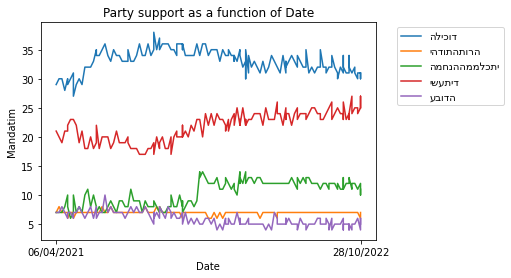

In [ ]:
supporting_rates(["הליכוד", "יהדותהתורה","המחנההממלכתי", "ישעתיד", "עבודה" ])

### Conclusions:
We see in this gragh the results of surveys for level of support in five parties according to the date in which the survey was conducted.
It is easy to see the increase in support for "המחנה הממלכתי" and "יש עתיד". We also see that "הליכוד" gained supportback in 2021 and since than has dropped a little bit.


### b)
Now we will add to the data frame to new columns: "Yamin" and "Smol" thar represents the supporing data for each side of the political map

In [ ]:
df["Yamin"] = df["הליכוד"]+df["הציונותהדתית"]+df['ש"ס']+df["יהדותהתורה"]
df["Smol"] = df["ישעתיד"]+df["המחנההממלכתי"] + df["עבודה"] + df["מרצ"]+df["המשותפת"]+df["ישראלביתנו"] + df['רע"מ']


Creating a plot of the supporing rates for the left vs. right side of the political map as a function over time
We will use the function we created in the previuos section. 

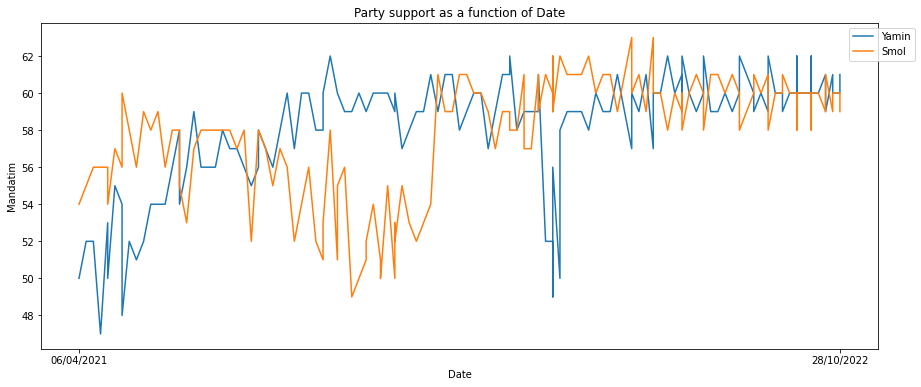

In [ ]:
supporting_rates(["Yamin", "Smol"])

## Conclusions:
We can see a crossway in the support of both blocks. The smol block had higher levels of support but than they dropped and the Yamin block gained the support. Afterwards we se the two level out together, a sudden drop in support for Yamin block while the Smol block remaines steady. finaly both blocks maintane the same level of support over time with little waves up and down.

**Question** 2

### a)
In order to calculate the distribution for the aurveys average results in the most accurate way, we will replace NA values with 0. 
We will create prob1 which is the propability of the average of all surveys, normalized by 120 and prob 2 which is the propability for each survey. 

In [ ]:
df = df.fillna(0)
prob = df.iloc[:,5:19].mean()/120

prob2 = df.iloc[:,5:19]/120



Now we will calculate the squared distance between prob1 and prob2 as was defined in the assignment.
We will call the distance diff. 

In [ ]:
p1 = prob.to_numpy().T
q1 = prob2.to_numpy()

diff = p1 - q1
diff = np.square(diff).sum(axis = 1)


Now we will create sactter plot for the squared distance (diff) vs. the number of people responding to the survey.

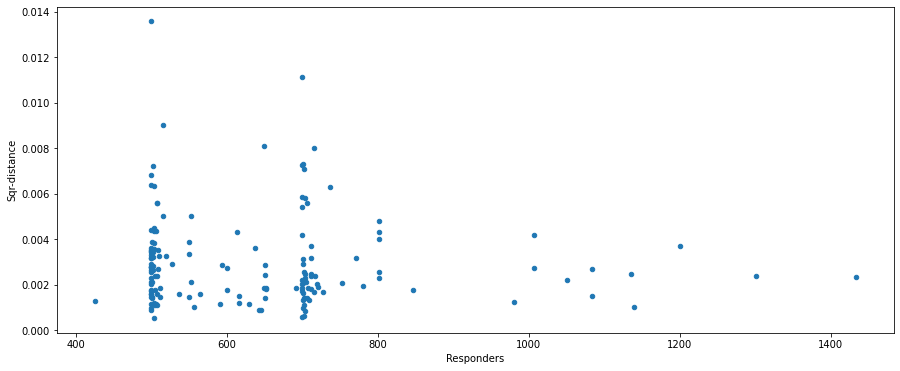

In [ ]:
Y_axis = diff
X_axis = df.iloc[:,2]
dist_resp_df = pd.DataFrame({'Responders': X_axis, 'Sqr-distance': Y_axis})
dist_resp_df.plot.scatter('Responders','Sqr-distance')


## Conclusions:
As one can see, 400-800 responders participated in most surveys. For surveys with 1000-1400 participants we can see a similar scatter accross the plot, while none of the distances are smaller then the distances we can see for the 400-800 participant surveys. Although not many surveys had 1000-1400 participants which limits what we can conclude, still we notice that more participants in a survey doesn't necessary mean closer to the mean of survey results.
We expected this result, since the survey accuracy is effected not only from quantaty of participents but quality of your sample group.

### b)
Calculating the distribution of average for each survey and calculating the squared distance for evrey pair of individuals. 
First we will modify the data frame:


In [ ]:
name_df = df.drop_duplicates("עורךמשאלים")
names = name_df["עורךמשאלים"].to_list()
name_list = [name[::-1] for name in names]
groupy = df.groupby(["עורךמשאלים"]).mean()/120
groupy = groupy.iloc[:,2:19]
groupy.iloc[:,2]

perm_dist_df = pd.DataFrame(index=range(len(name_list)),columns=range(len(name_list)))



Now we will calculate the distance for each pair of surveys.

In [ ]:
n = len(name_list)
for i in range(n):
    for j in range(n):
        if i != j:
            cal = (np.square(groupy.iloc[i] - groupy.iloc[j])).sum()
            perm_dist_df.loc[i,j] = float(cal)
        if i == j:
            perm_dist_df.loc[i,j] = float(0)

perm_dist_df.columns =[name_list]
perm_dist_df.index = [name_list]

mask = np.zeros_like(perm_dist_df)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True


perm_dist_df = perm_dist_df[perm_dist_df.columns].astype(float)


Creating a hitmap describing the matrix of distance we got:

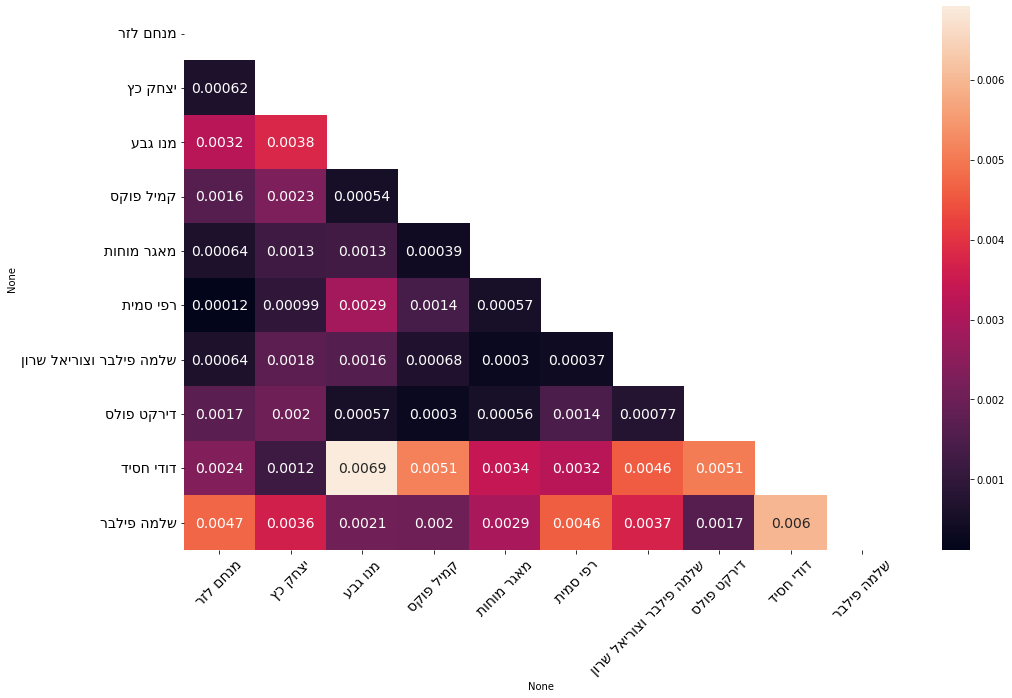

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(perm_dist_df, mask = mask, annot = True, annot_kws = {"size": 14})
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize  = 14)
plt.show()

## Conclusions:

The lighter squares in the heatmap suggest larger distance between a pair of pollers. 
As we can see from the heatmap above, there are some unusual observations:
we can see that the largest distance is between the Polls conducting by "מנו גבע" and "דודי חסיד".
We can see that the two bottom rows are generally lighter than the rest of the map. 
In that case, we can conclude that the polls conducted by "שלמה פילבר" and "דודי חסיד" are relativly disfferent from the rest of the polls.




### c)

The following plot represent the number of average mandates of evrey party, grouped by the different surveys. 
First we will modify the data frame in order to create a redabke plot.\
we will reverse the axis due to problem with Hebrew text and we will create new data frame by grouping the data by the type of survey and taking the average value of each cell.


In [ ]:
df2 = df.iloc[:,4:]
parties_names = df2.keys()
fixed_names = [name[::-1] for name in parties_names]
df2 = df2.set_axis(fixed_names,axis = 'columns')
grouped_df = df2.groupby(fixed_names[0]).mean().T
grouped_df
survey_names = grouped_df.keys()
fixed_survey_names = [name[::-1] for name in survey_names]
grouped_df = grouped_df.set_axis(fixed_survey_names, axis = 'columns')
legend_title = fixed_names[0]

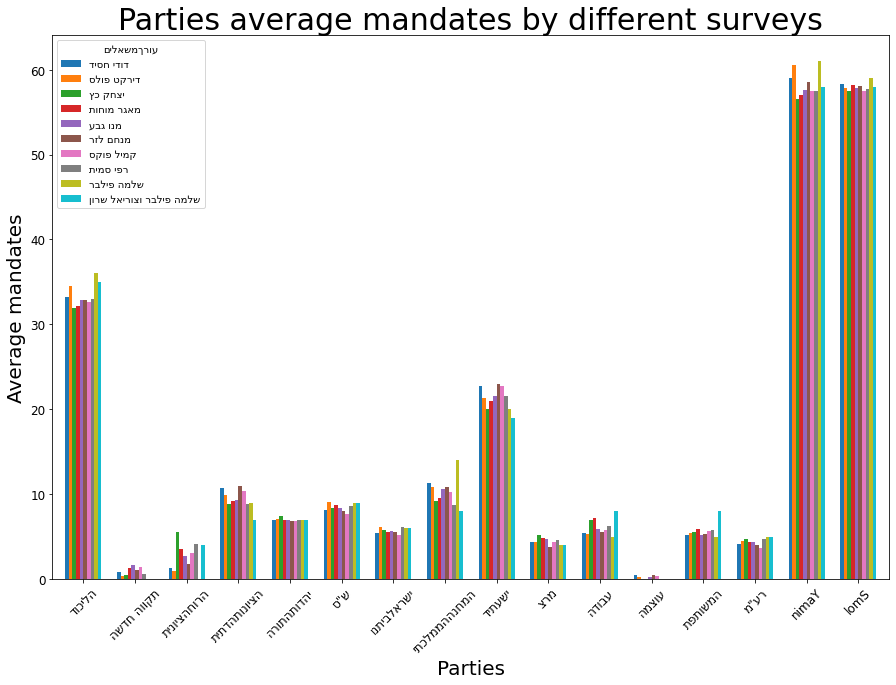

In [ ]:
ax = grouped_df.plot(kind = 'bar',figsize = (15,10) , fontsize = 'large',width = 0.7, rot = 45)
ax.set_xlabel("Parties", fontsize = 20)
ax.set_ylabel("Average mandates", fontsize = 20)
ax.set_title("Parties average mandates by different surveys", fontsize = 30)
ax.legend(title = legend_title)

## Conclusions:
as we can see from the bar plot above, we can see that for the parties: "הרוח הציונית", "יש עתיד , "המחנה הממלכתי, "עבודה
there is a big differece between each survey's results. 